# Jeremy notebook for final project

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import k_means
from helpers import *
from sklearn import cluster
%load_ext autoreload
%autoreload 2

## Preparation

This is just a preparation step in order to set the model for the chips counting.

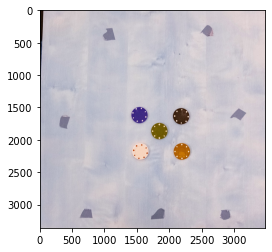

In [2]:
table_segmentation = segment_table("data/image_setup/chips.jpg")
plt.imshow(table_segmentation)
plt.show()

In [3]:
brightness = get_brightness(table_segmentation)
print(brightness)

0.775353725490196


The median of all the pixels from the grayscale image is 0.775. We are going to use it to adjust the brightness of the images that we have to analyze.

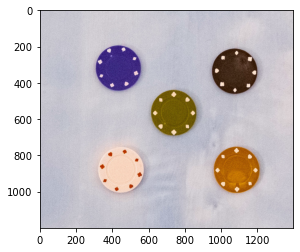

In [4]:
chips = table_segmentation[1300:2500,1100:2500]
plt.imshow(chips)
plt.show()

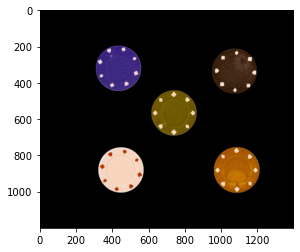

In [5]:
mask_all, masks = find_chips(chips)

all_chips = chips.copy()
all_chips[mask_all==0] = 0
plt.imshow(all_chips, cmap='gray')
plt.show()

[[ 63.89185696  38.3049729   20.56663416]
 [244.65215169 212.51003441 192.66339569]
 [177.01685255  99.00902083   7.70202559]
 [ 63.9685993   43.35118185 130.86672001]
 [112.02564156  88.15416465   6.7983354 ]]


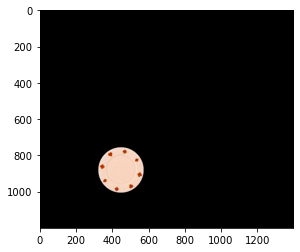

1


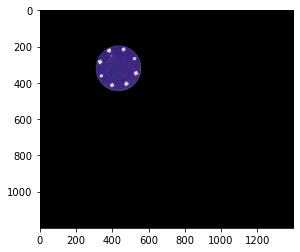

3


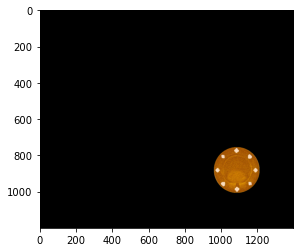

2


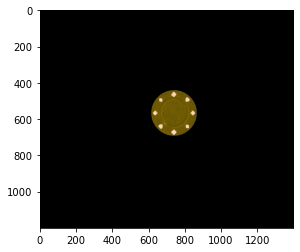

4


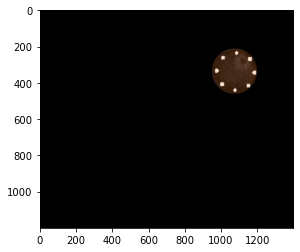

0


In [6]:
g = cluster.KMeans(n_clusters=5).fit(chips[(mask_all == 1)]) 
print(g.cluster_centers_)

for msk in masks:
    pred = g.predict(chips[msk == 1])
    one_chip = chips.copy()
    one_chip[msk == 0] = 0
    plt.imshow(one_chip)
    plt.show()
    labels = np.array([(pred==0).sum(), (pred==1).sum(), (pred==2).sum(), (pred==3).sum(), (pred==4).sum()])
    print(np.argmax(labels))

The centroids can be reused as we have:
- (244.61644278, 212.42504676, 192.49292637) for the white chips
- (63.91486714, 38.27724643, 20.43698002) for the black chips
- (112.0877551, 88.01122449, 6.35982143) for the green chips
- (63.13350215, 42.42452934, 130.4313773) for the blue chips
- (177.26876336, 99.27761832, 8.00378626) for the red chips
It means that we can order them such that cluster 0 corresponds to the white chips, cluster 1 to the black chips, cluster 2 to the red chips, cluster 3 to the green chips and cluster 4 to the blue chips.

In [7]:
# Re-initialize the centroids with the (rounded) values that have been found previously 
g.cluster_centers_ = np.array([[245., 213., 193.], [64., 38., 21.], [177., 99., 8.], [112., 89., 7.], [64., 43., 131.]])

## Table segmentation

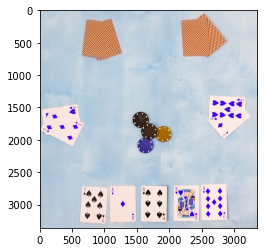

In [8]:
table_segmentation = segment_table("data/train/train_07.jpg")
plt.imshow(table_segmentation)
plt.show()

In [9]:
# Pre process
kernel = np.ones((5,5),np.float32)/25
table_filtered = cv2.filter2D(table_segmentation,-1,kernel)
table_canny = cv2.Canny(table_filtered, 10, 200)

# Extract cards
T_cards = extract_T_cards(table_segmentation, table_canny)
right_cards = extract_right_cards(table_segmentation, table_canny)
left_cards = extract_left_cards(table_segmentation, table_canny)
top_cards = extract_top_cards(table_segmentation, table_canny)

# Classify cards here

# Count chips
labels = get_chips_labels(table_segmentation, g, brightness, plot=False)
print('Number of white chips:', (labels==0).sum())
print('Number of black chips:', (labels==1).sum())
print('Number of red chips:', (labels==2).sum())
print('Number of green chips:', (labels==3).sum())
print('Number of blue chips:', (labels==4).sum())

Number of white chips: 0
Number of black chips: 2
Number of red chips: 1
Number of green chips: 0
Number of blue chips: 1
